In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [6]:
selected_data_A = pd.read_excel("../data/processed/wax_selected_A.xls", index_col=0)
raw_data_A = pd.read_csv("../data/interim/wax_data_A.csv", index_col=0)
converted_selected_data_A = pd.DataFrame()

selected_data_B = pd.read_excel("../data/processed/wax_selected_B.xls", index_col=0)
raw_data_B = pd.read_csv("../data/interim/wax_data_B.csv", index_col=0)
converted_selected_data_B = pd.DataFrame()

In [7]:
# recoding numerical vlues to text
coder = {"a": 1, "b": 2, "c": 3, "d": 4, "h": 5, "-":0}
coder_genotype = {"a": "Homozygous type 1", "b": "Homozygous type 2", "c": "Homozygous type 2 or heterozygous", "d": "Homozygous 1 or heterozygous", "h": "Heterozygous", "-": "Unknown"}

encoder_keys = coder.keys()
encoder_values = coder.values()

encoder = dict(zip(encoder_values, encoder_keys))

In [8]:
for col in selected_data_A.columns.tolist():
    if col != "wax":
        converted_selected_data_A[col] = selected_data_A[col].map(encoder)
        converted_selected_data_A[col] = converted_selected_data_A[col].map(coder_genotype)
    else:
        converted_selected_data_A[col] = selected_data_A[col].map({1: "wax", 0: "wax-less"})
        
for col in selected_data_B.columns:
    if col != "wax_F2":
        converted_selected_data_B[col] = selected_data_B[col].map(encoder)
        converted_selected_data_B[col] = converted_selected_data_B[col].map(coder_genotype)

    else:
        converted_selected_data_B[col] = selected_data_B[col].map({1: "wax", 0: "wax-less"})

In [9]:
markers_A = converted_selected_data_A.columns.to_list()
markers_A.remove("wax")

markers_B = converted_selected_data_B.columns.to_list()
markers_B.remove("wax_F2")

In [10]:
converted_selected_data_A

,3591025,3889647,3585843,3358122,3341848,3596333_37:G>A,3362424_51:T>G,3341813,3590103,3736285,5217151,3597618_37:G>A,3583533,3583762,3353144,3342436,3576641,wax
BK2,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous type 1,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous 1 or heterozygous,wax
BK4,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Heterozygous,Heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,wax
BK5,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous 1 or heterozygous,Heterozygous,Heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Heterozygous,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous 1 or heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,wax
BK6,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous type 1,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,wax
BK9,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous type 1,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,wax
BK10,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Heterozygous,Heterozygous,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 2 or heterozygous,Homozygous 1 or heterozygous,wax
BK11,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2 or heterozygous,Unknown,Homozygous type 2,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2 or heterozygous,Homozygous type 2,wax-less
BK13,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous type 1,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous 1 or heterozygous,Homozygous type 1,Homozygous 1 or heterozygous,wax
BK14,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2 or heterozygous,Homozygous type 2,Homozygous type 2,Homozygous 1 or heterozygous,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2,Homozygous type 2 or

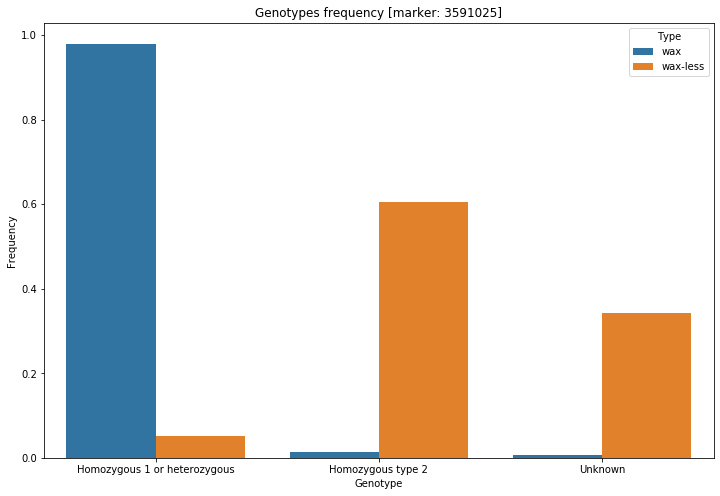

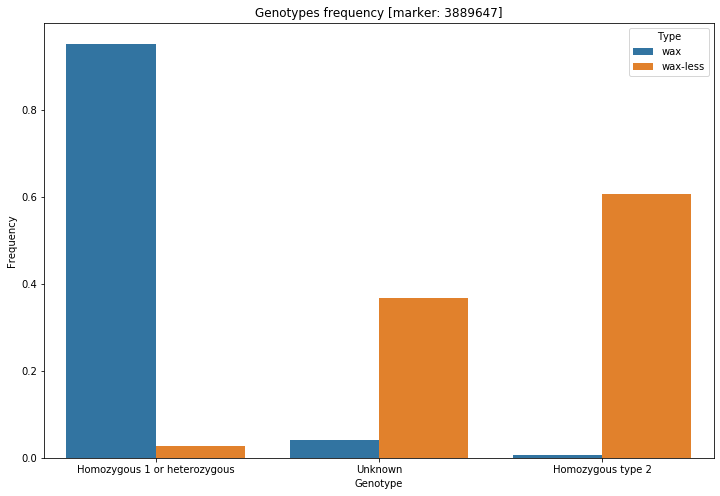

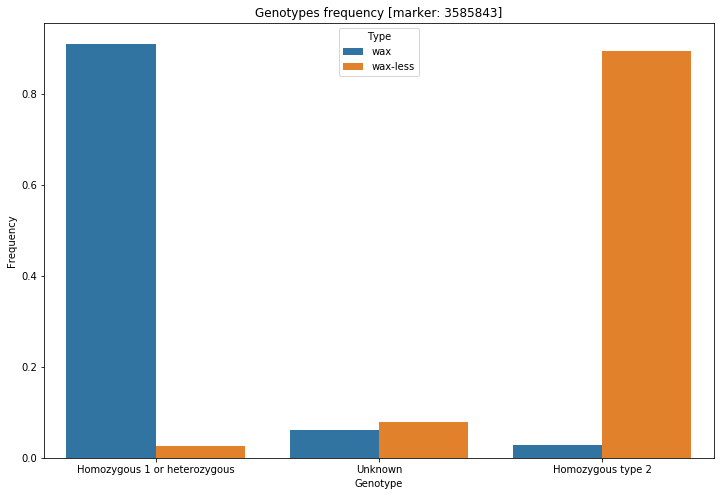

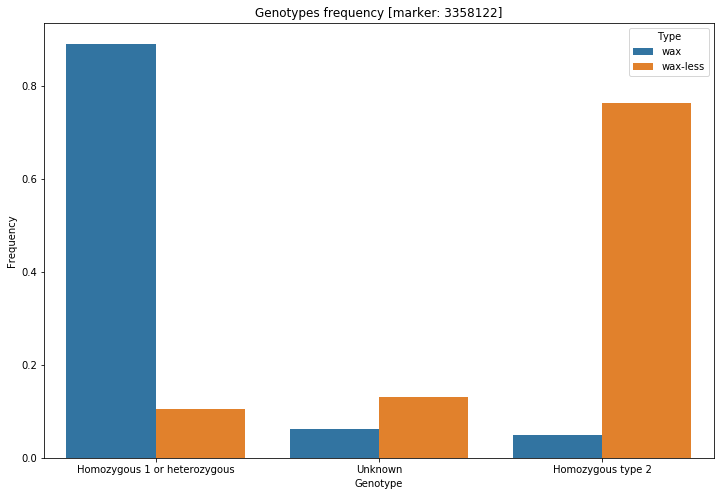

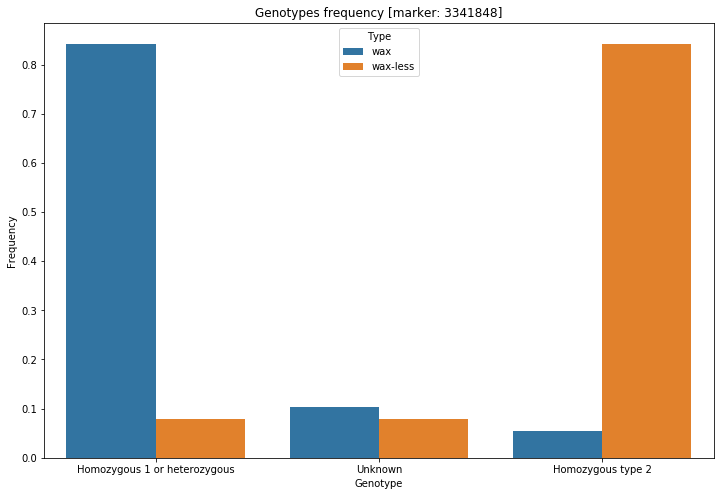

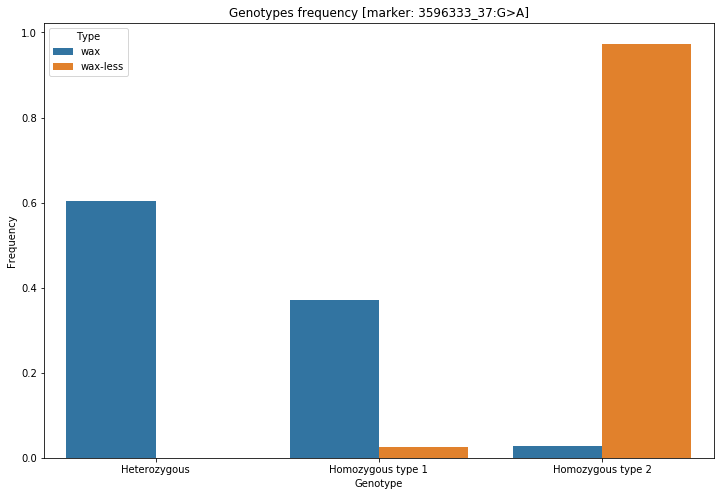

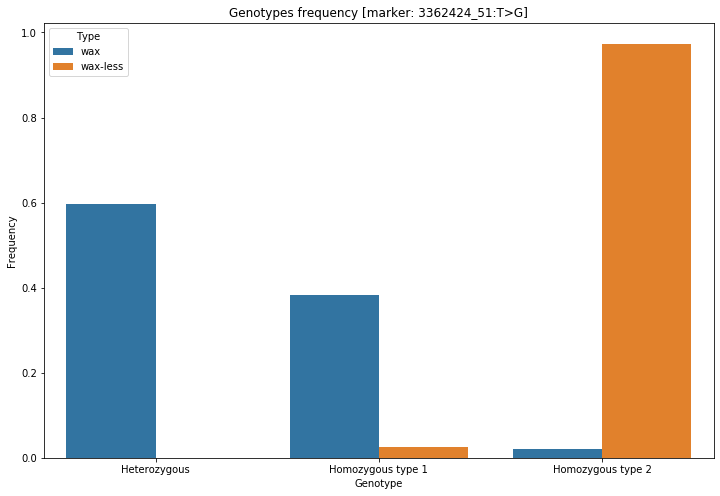

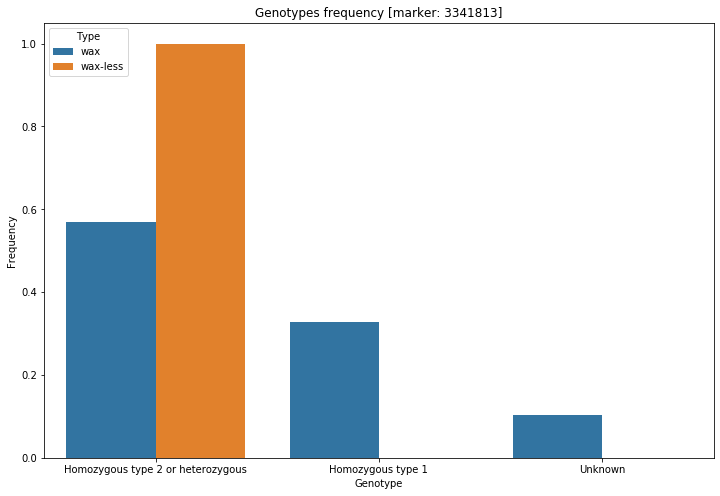

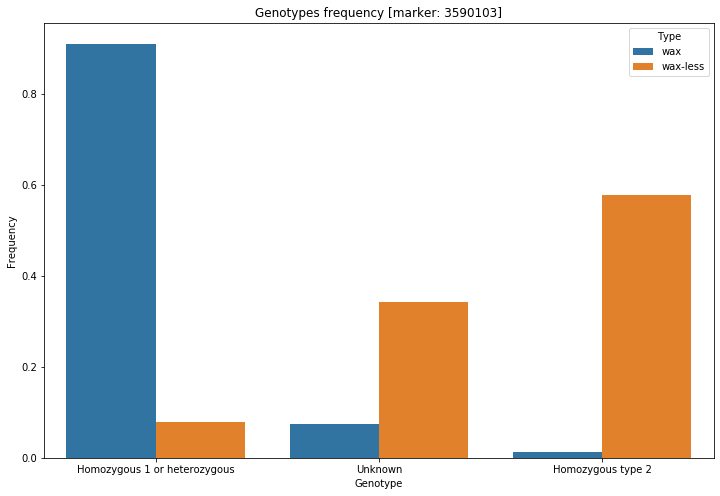

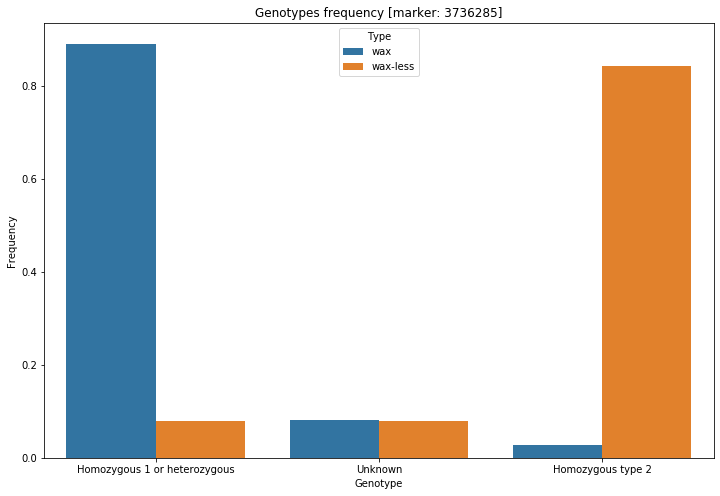

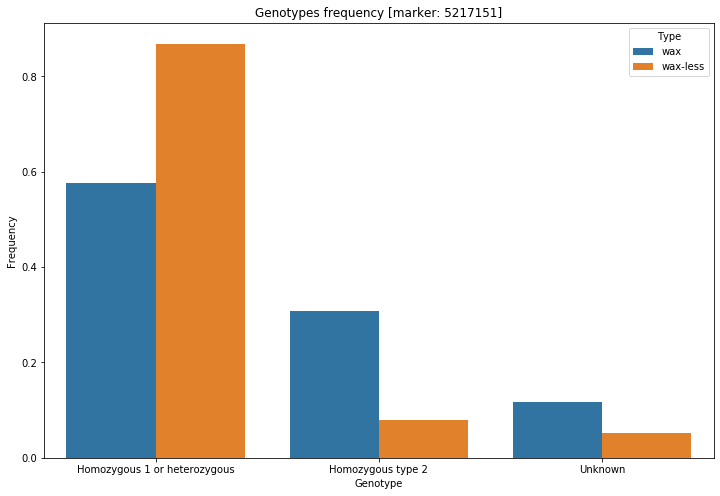

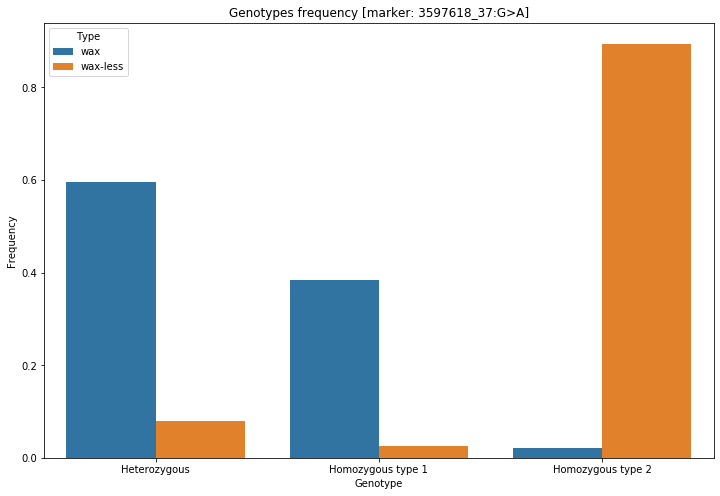

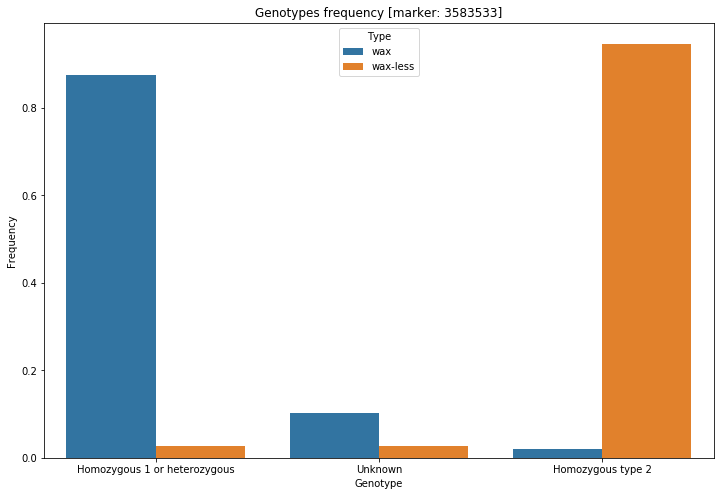

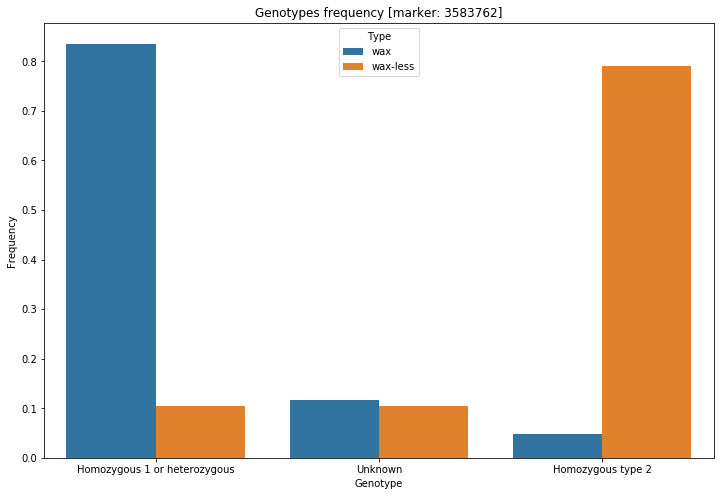

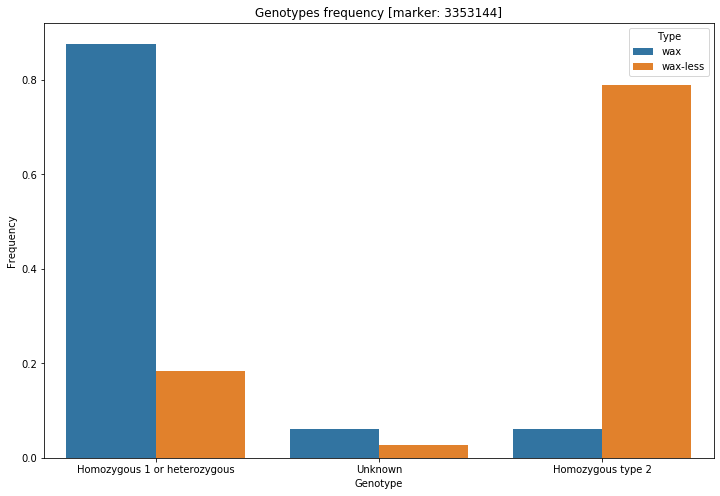

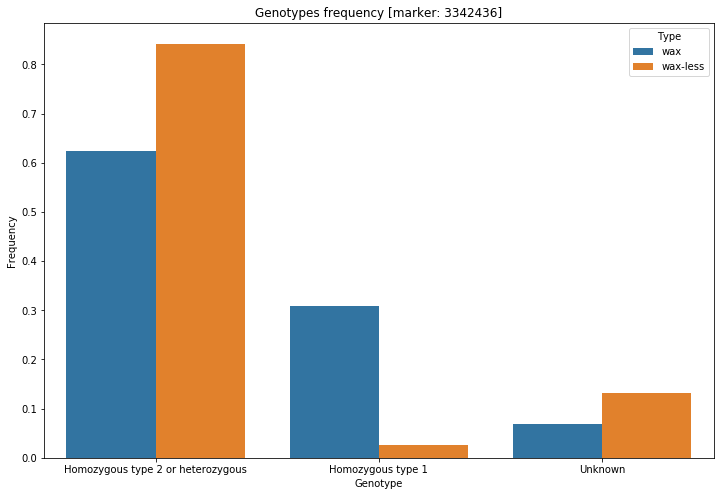

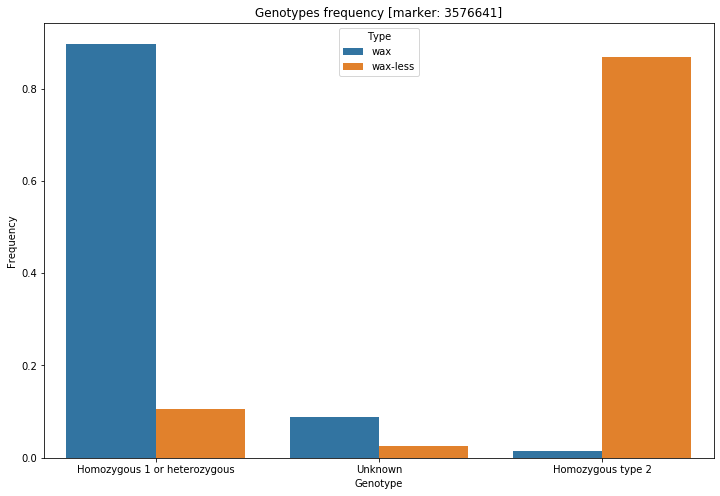

In [17]:
for marker in markers_A:
    data = converted_selected_data_A[[marker, "wax"]]
    
    value_counts_wax = data[data["wax"] == "wax"][marker].value_counts()
    value_counts_waxless = data[data["wax"] == "wax-less"][marker].value_counts()
    
    wax_frequency = value_counts_wax / sum(value_counts_wax)
    wax_less_frequency = value_counts_waxless / sum(value_counts_waxless)

    summary_wax = {"Frequency": wax_frequency}
    summary_wax = pd.DataFrame.from_dict(summary_wax, orient='columns')
    summary_wax[""] = ""
    summary_wax["Type"] = "wax"

    summary_waxless = {"Frequency": wax_less_frequency}
    summary_waxless = pd.DataFrame.from_dict(summary_waxless, orient='columns')
    summary_waxless[""] = ""
    summary_waxless["Type"] = "wax-less"

    summary = pd.concat((summary_wax, summary_waxless), axis=0)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    
    ax.set_title(f"Genotypes frequency [marker: {marker}]")
    ax.set_xlabel("Genotype")
    
    sns.barplot(data=summary, x=summary.index, y="Frequency", hue="Type", ax=ax)
    plt.show()
    fig.savefig(f"../data/processed/plots/set_A/{marker}_A.png")
    
    del fig

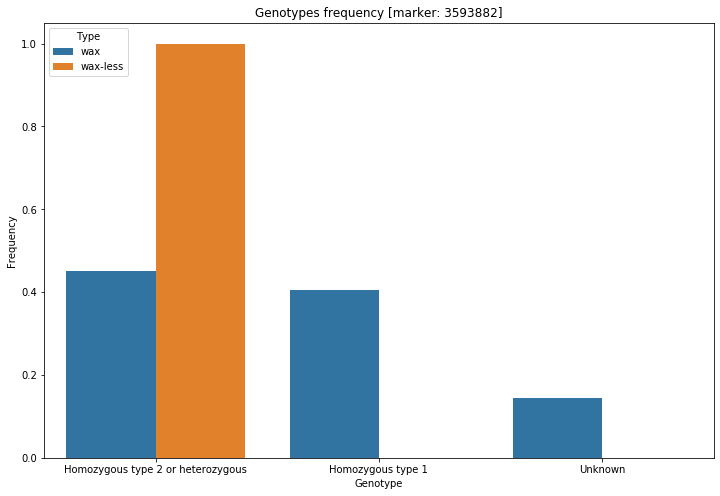

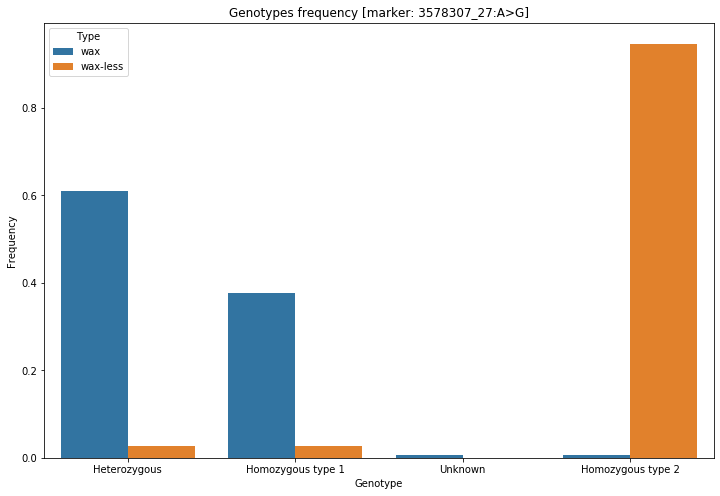

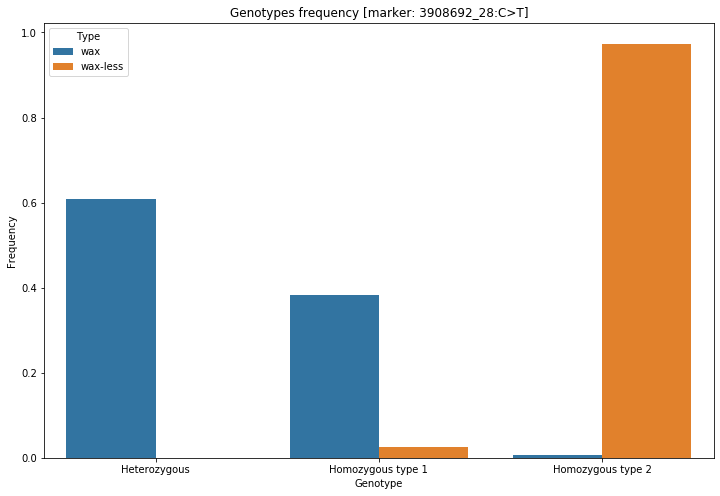

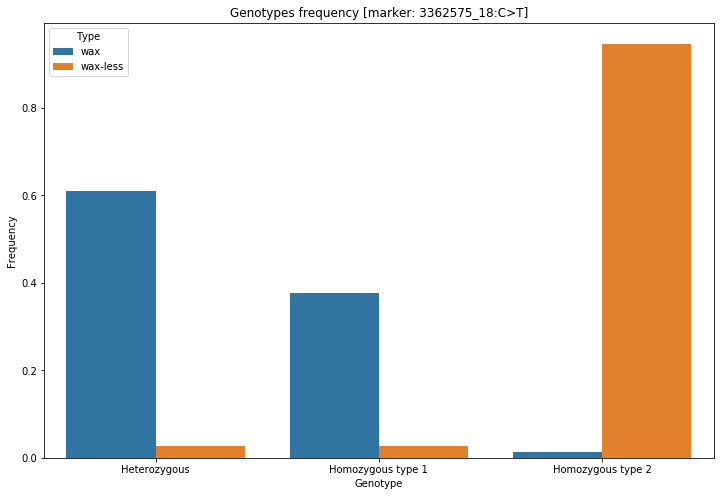

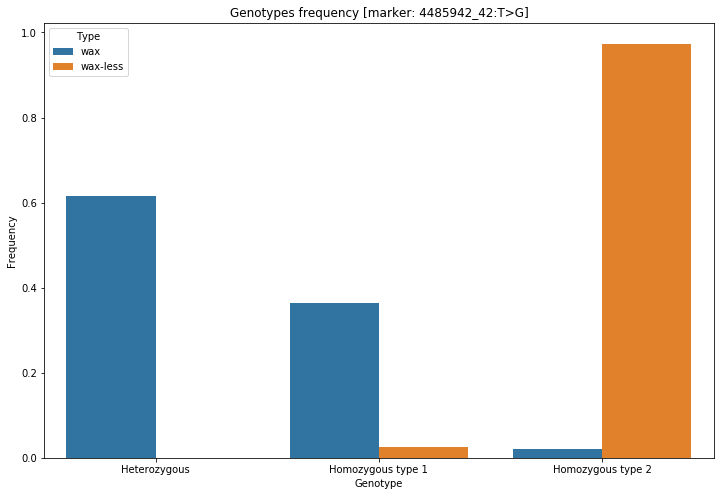

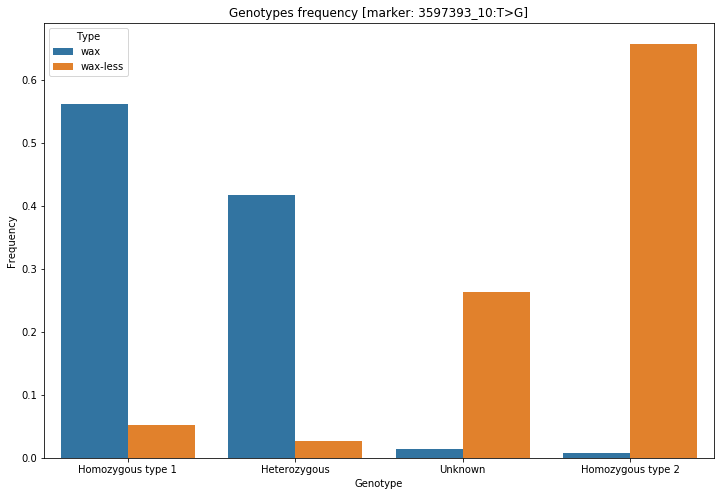

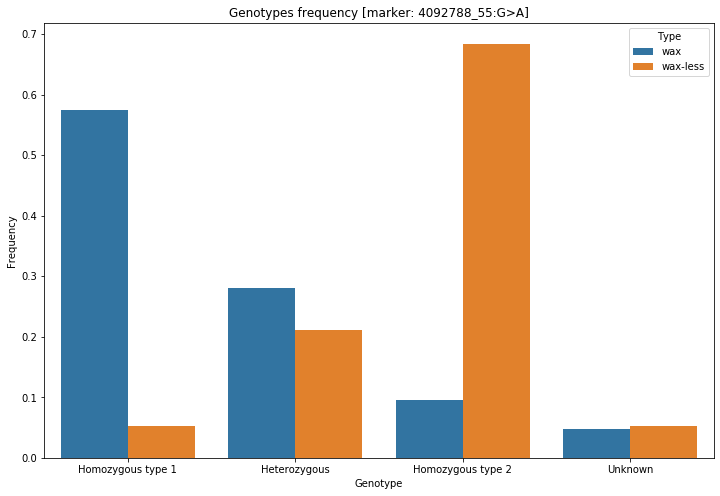

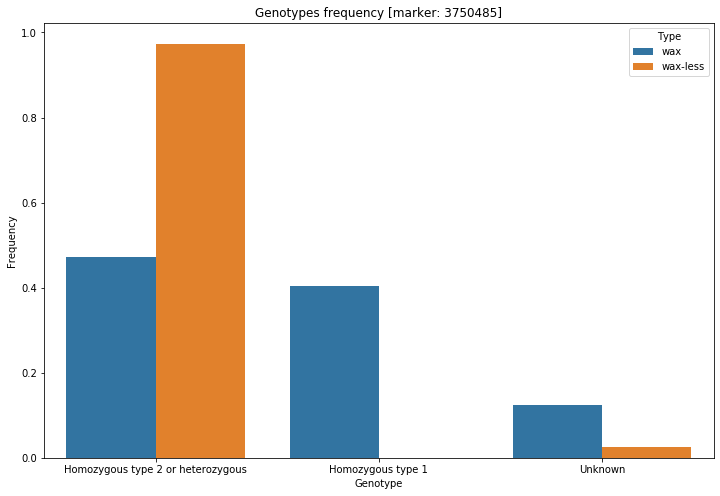

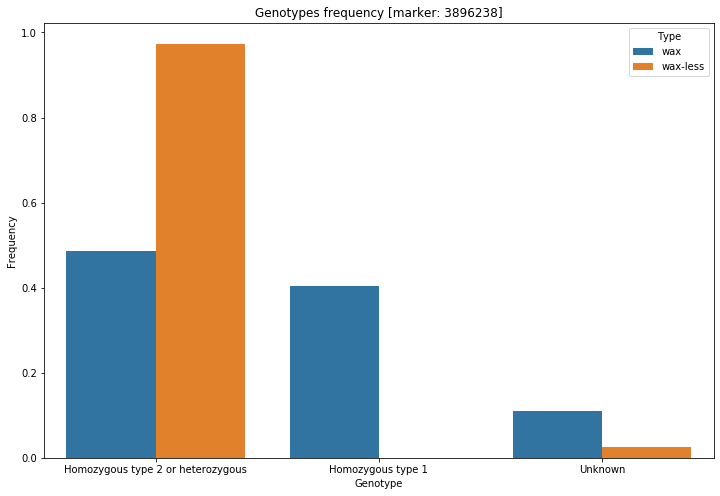

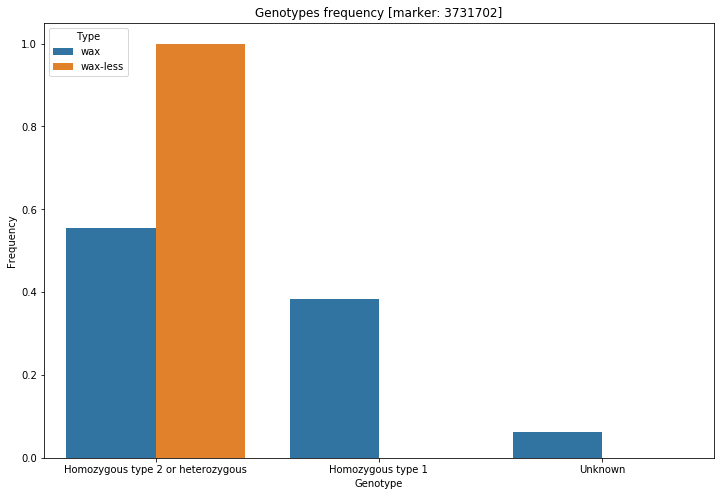

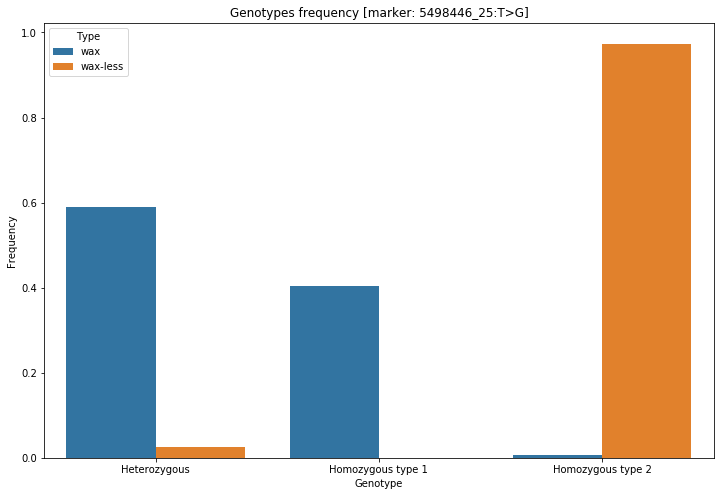

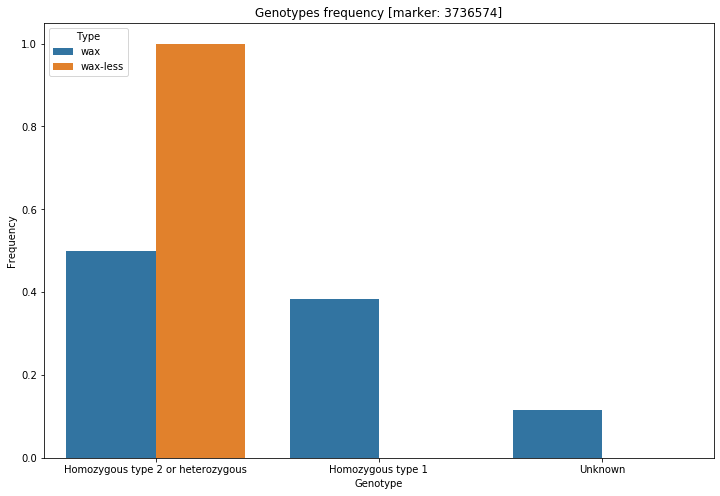

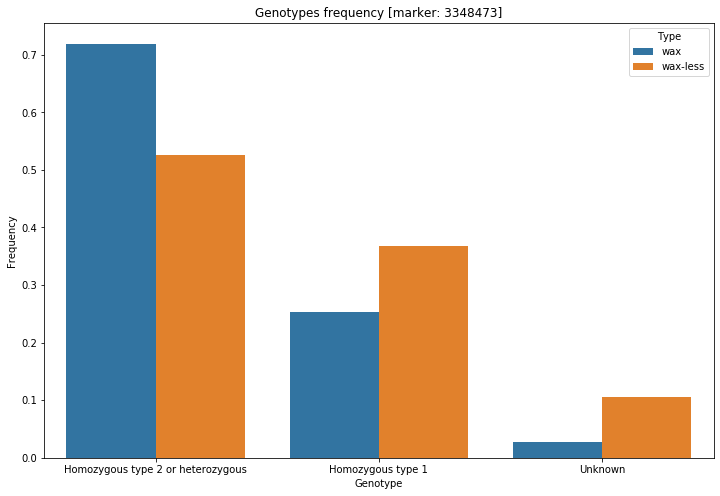

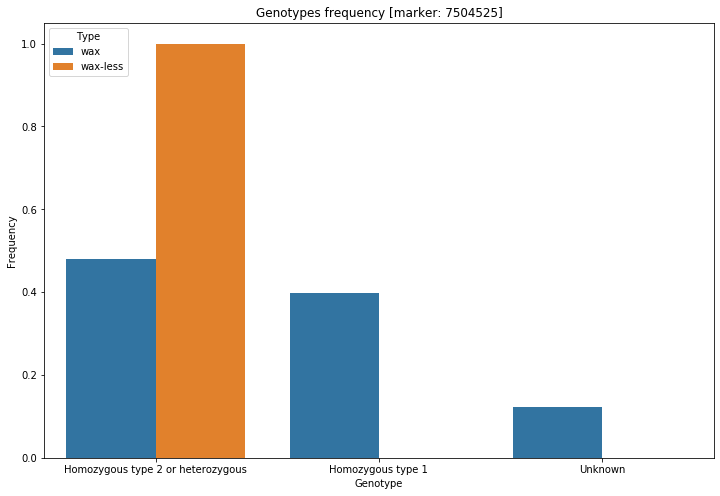

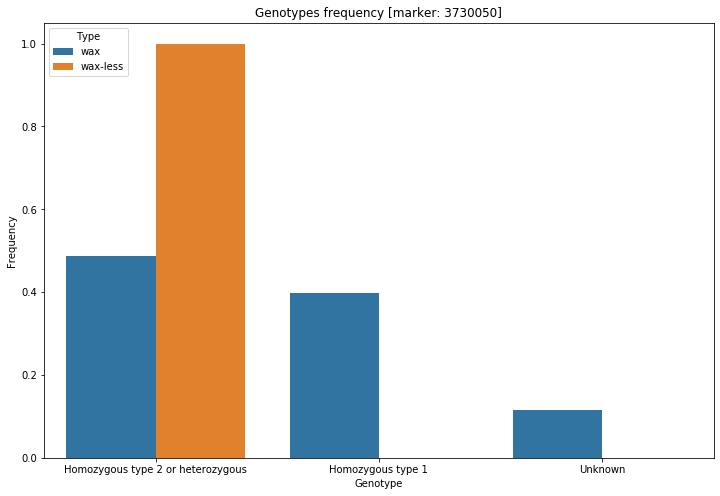

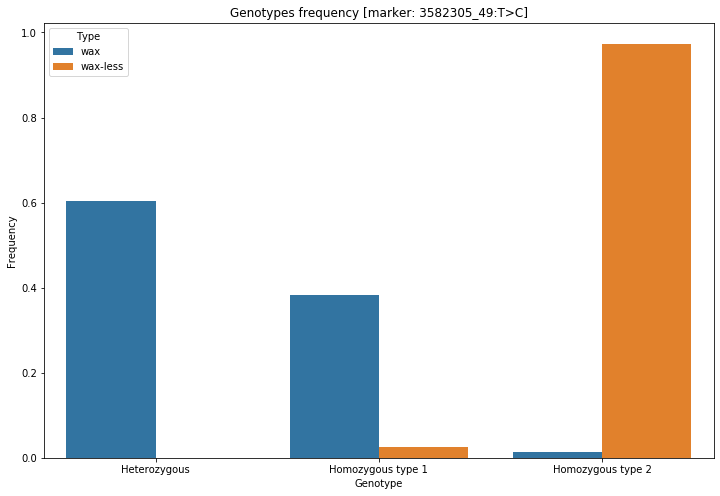

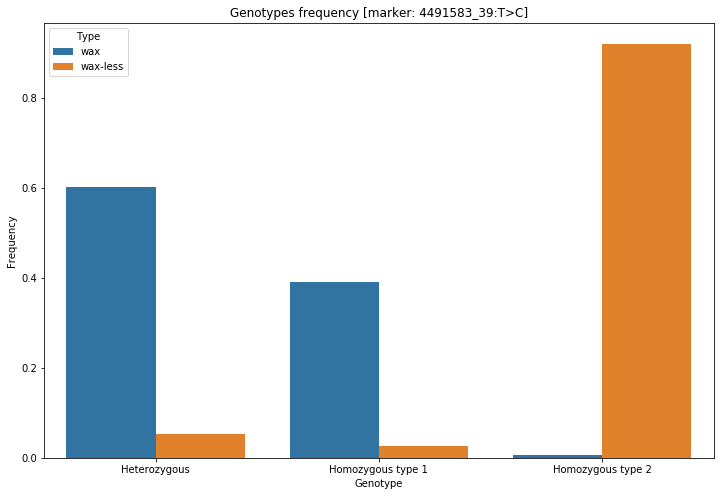

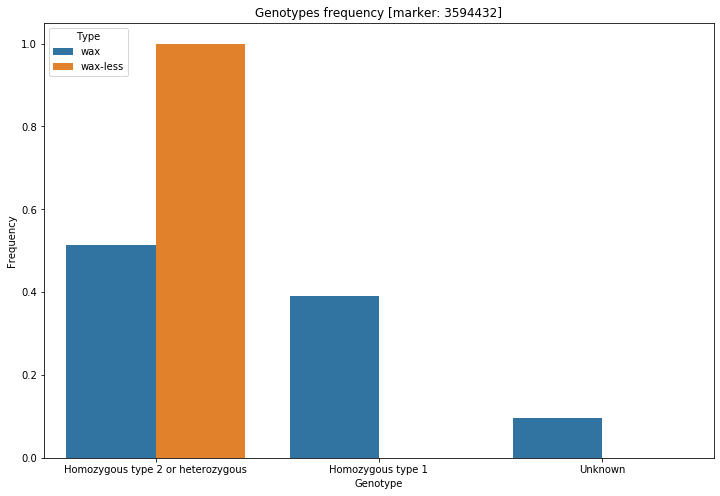

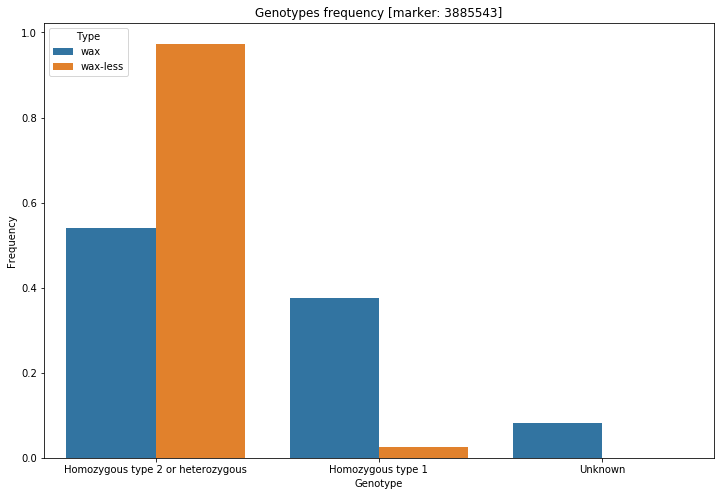

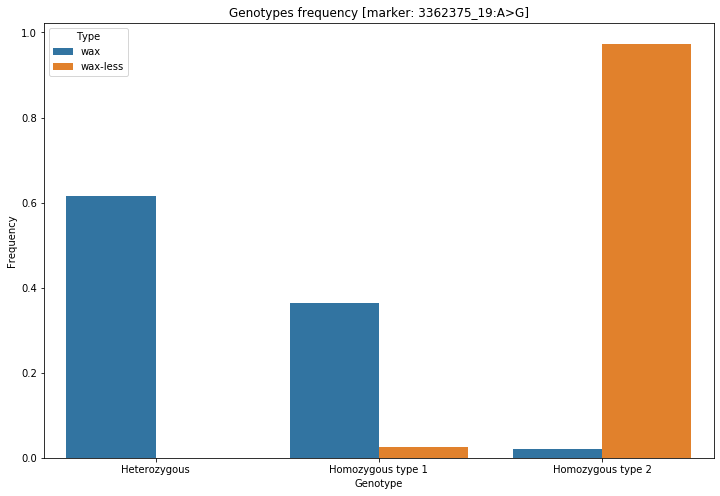

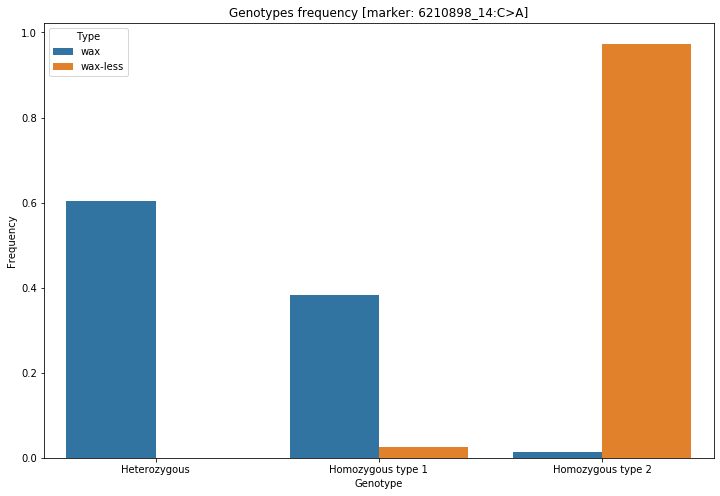

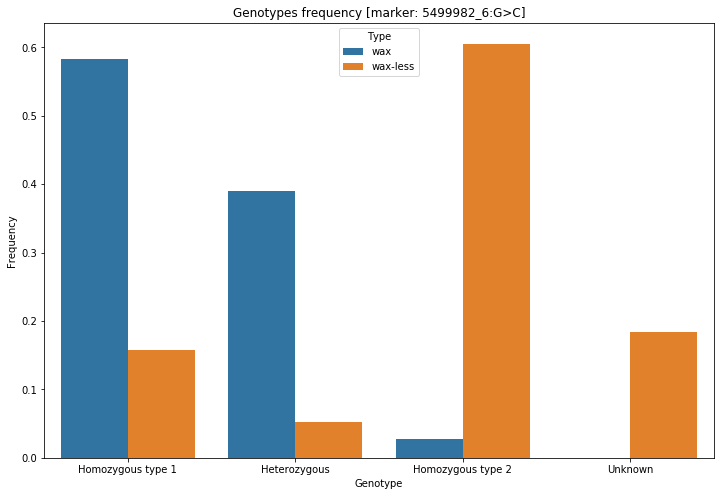

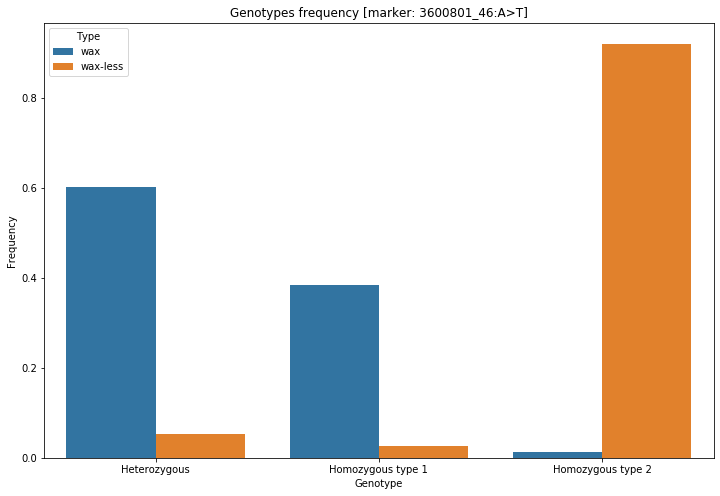

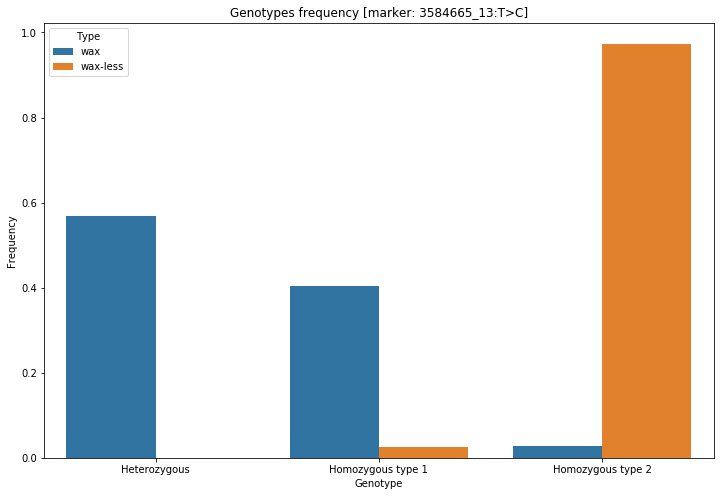

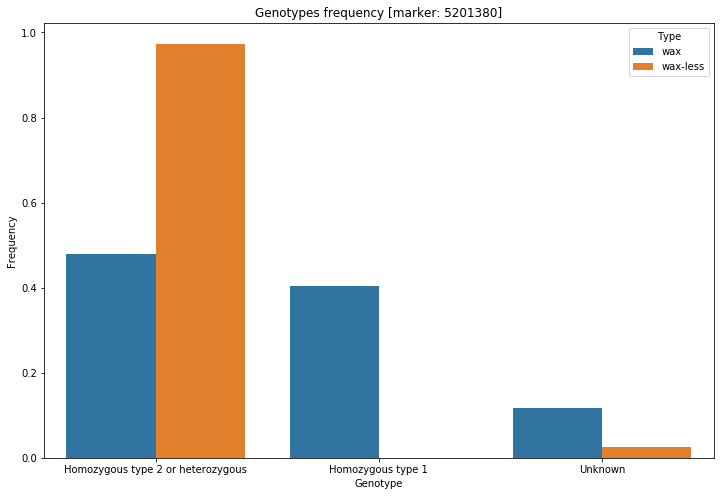

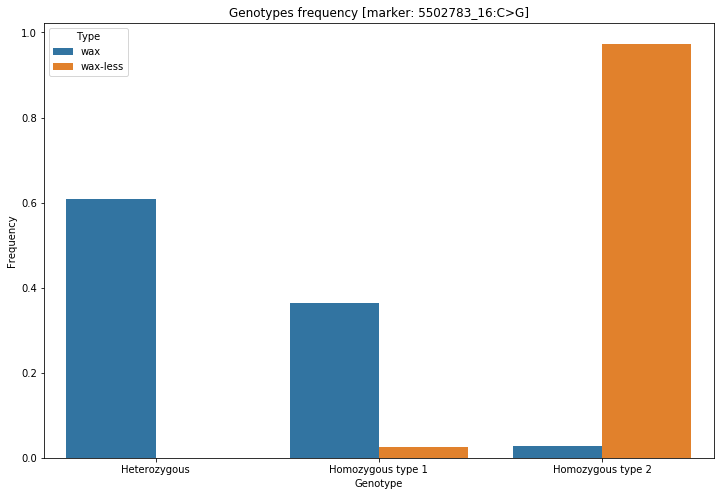

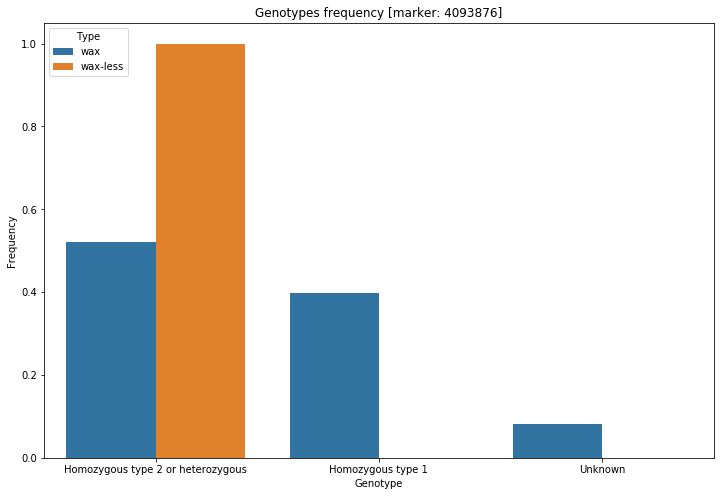

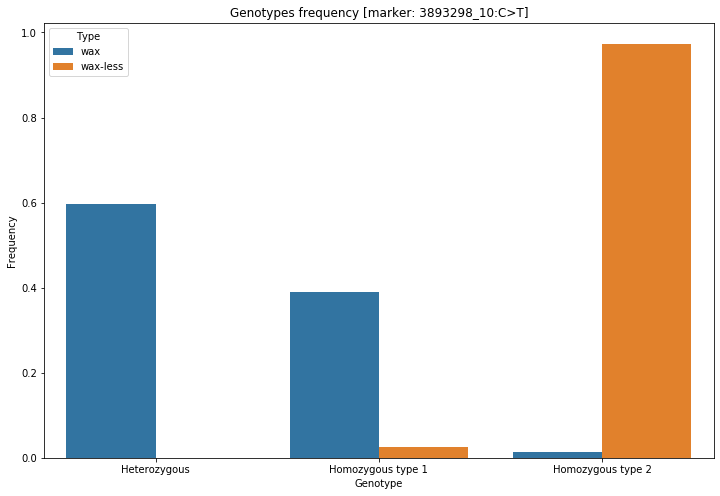

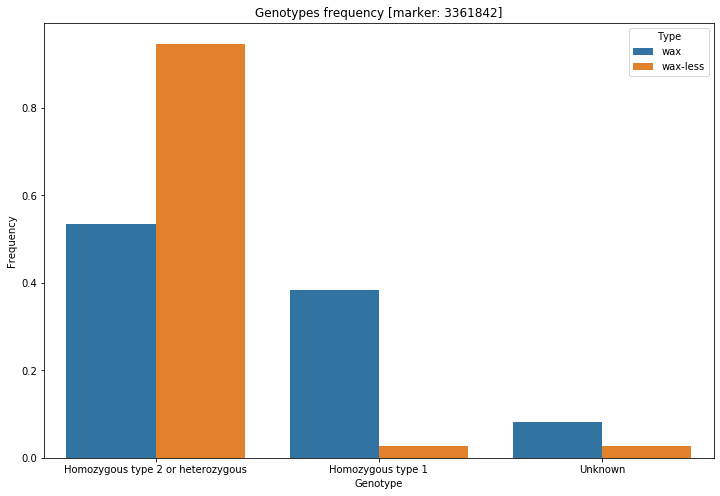

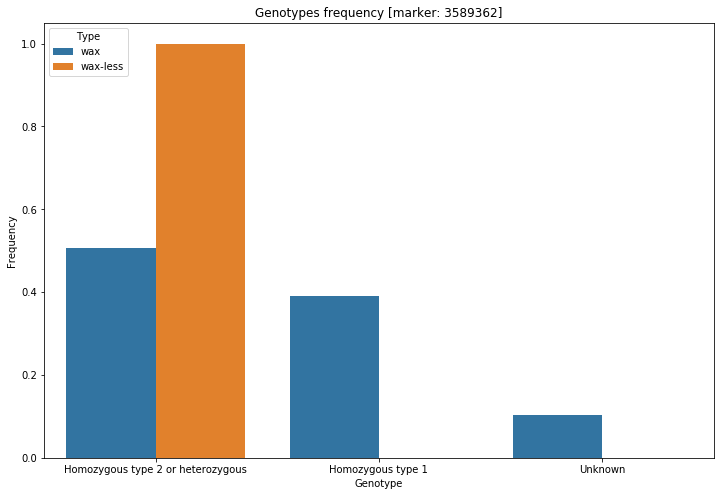

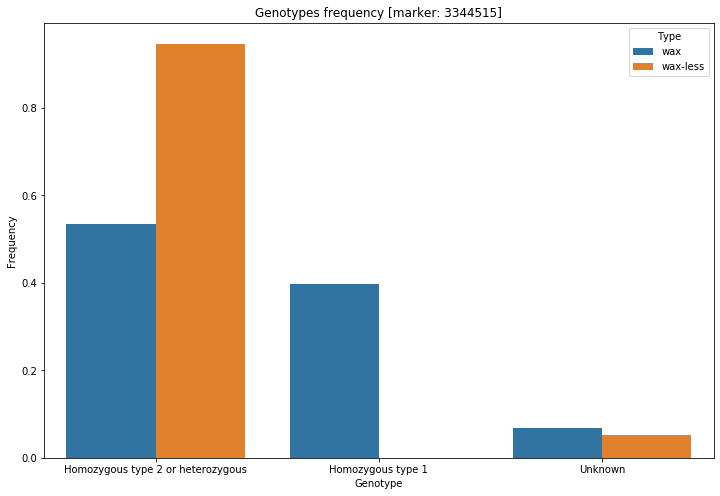

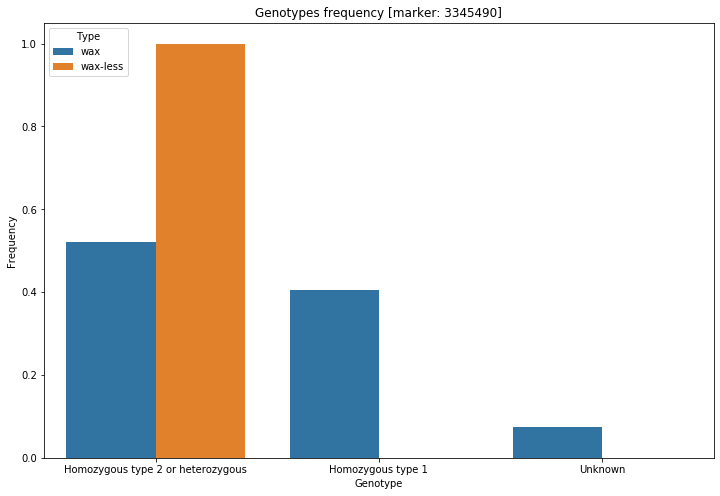

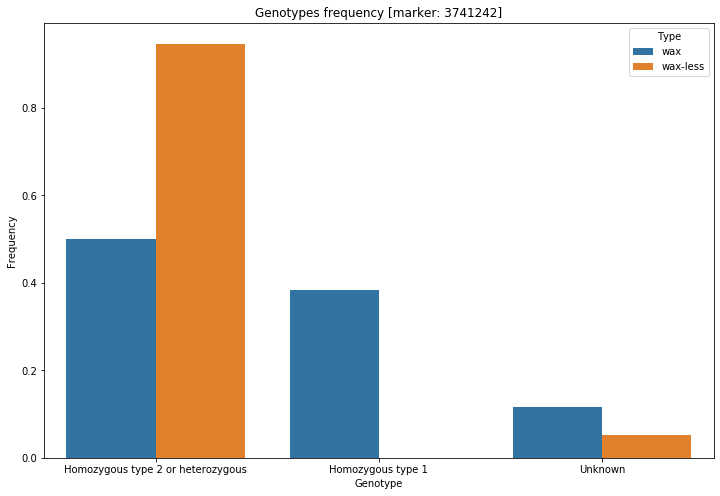

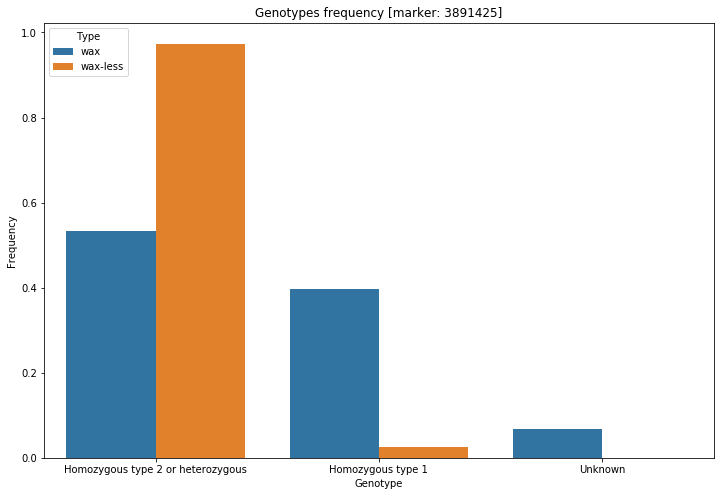

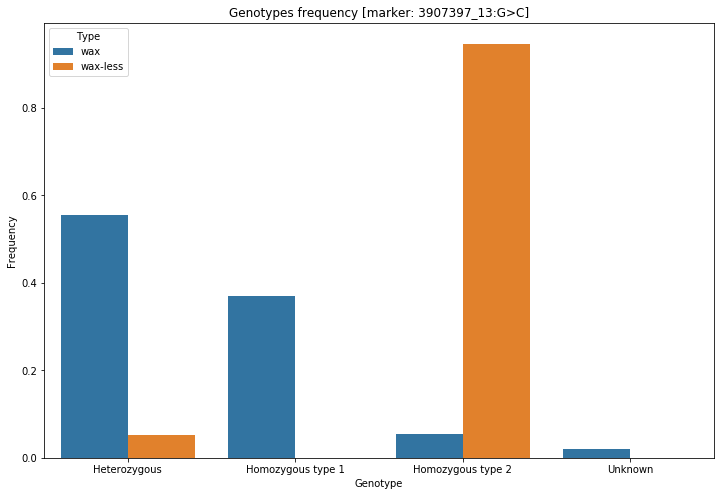

In [19]:
for marker in markers_B:
    data = converted_selected_data_B[[marker, "wax_F2"]]
    
    value_counts_wax = data[data["wax_F2"] == "wax"][marker].value_counts()
    value_counts_waxless = data[data["wax_F2"] == "wax-less"][marker].value_counts()
    
    wax_frequency = value_counts_wax / sum(value_counts_wax)
    wax_less_frequency = value_counts_waxless / sum(value_counts_waxless)
    
    summary_wax = {"Frequency": wax_frequency}
    summary_wax = pd.DataFrame.from_dict(summary_wax, orient='columns')
    summary_wax[""] = ""
    summary_wax["Type"] = "wax"
    
    summary_waxless = {"Frequency": wax_less_frequency}
    summary_waxless = pd.DataFrame.from_dict(summary_waxless, orient='columns')
    summary_waxless[""] = ""
    summary_waxless["Type"] = "wax-less"
    
    summary = pd.concat((summary_wax, summary_waxless), axis=0)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    
    ax.set_title(f"Genotypes frequency [marker: {marker}]")
    ax.set_xlabel("Genotype")
    
    sns.barplot(data=summary, x=summary.index, y="Frequency", hue="Type", ax=ax)
    plt.show()
    fig.savefig(f"../data/processed/plots/set_B/{marker}_B.png")
    
    del fig

In [20]:
# tSNE

In [21]:
# Dataset [selected] A
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=101, method="exact")

X_A = scaler.fit_transform(X=selected_data_A.drop("wax", axis=1))
A_reduced = tsne.fit_transform(X_A)

A_labels = converted_selected_data_A["wax"].values.reshape(-1, 1)
A_reduced = np.concatenate((A_reduced, A_labels), axis=1)
A_reduced = pd.DataFrame(A_reduced, columns=["Component 1", "Component 2", "Trait"])

In [22]:
# Dataset [raw] A
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=101, method="exact")

X_A = scaler.fit_transform(X=raw_data_A.drop("wax", axis=1))
A_reduced_raw = tsne.fit_transform(X_A)

A_labels_raw = converted_selected_data_A["wax"].values.reshape(-1, 1)
A_reduced_raw = np.concatenate((A_reduced_raw, A_labels_raw), axis=1)
A_reduced_raw = pd.DataFrame(A_reduced_raw, columns=["Component 1", "Component 2", "Trait"])

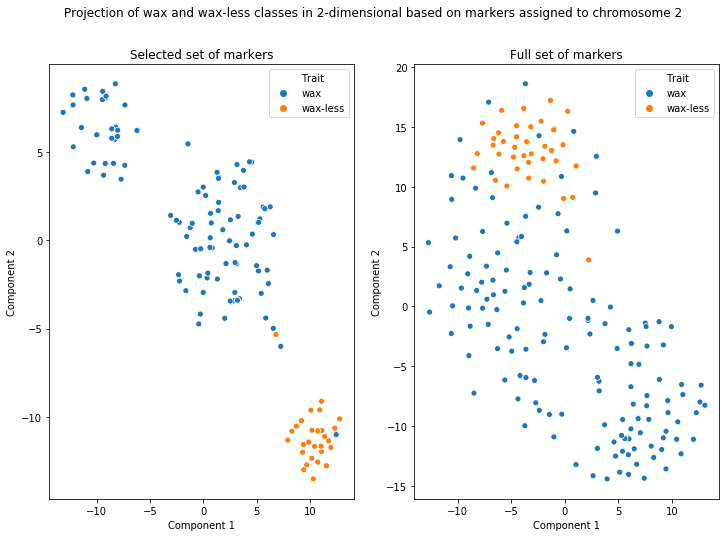

In [23]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle("Projection of wax and wax-less classes in 2-dimensional based on markers assigned to chromosome 2")
ax1.title.set_text('Selected set of markers')
ax2.title.set_text('Full set of markers')

# data after selection
sns.scatterplot(data=A_reduced, x="Component 1", y="Component 2", hue="Trait", ax=ax1)

# raw data
sns.scatterplot(data=A_reduced_raw, x="Component 1", y="Component 2", hue="Trait", ax=ax2)

In [24]:
fig.savefig("../data/processed/plots/set_A/tSNE_A.png")
del fig

In [26]:
# Dataset [selected] B
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=101, method="exact")

X_B = scaler.fit_transform(X=selected_data_B.drop("wax_F2", axis=1))
B_reduced = tsne.fit_transform(X_B)

B_labels = converted_selected_data_B["wax_F2"].values.reshape(-1, 1)
B_reduced = np.concatenate((B_reduced, B_labels), axis=1)
B_reduced = pd.DataFrame(B_reduced, columns=["Component 1", "Component 2", "Trait"])

In [27]:
# Dataset [raw] B
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=101, method="exact")

X_B = scaler.fit_transform(X=raw_data_B.drop("wax_F2", axis=1))
B_reduced_raw = tsne.fit_transform(X_B)

B_labels_raw = converted_selected_data_B["wax_F2"].values.reshape(-1, 1)
B_reduced_raw = np.concatenate((B_reduced_raw, B_labels_raw), axis=1)
B_reduced_raw = pd.DataFrame(B_reduced_raw, columns=["Component 1", "Component 2", "Trait"])

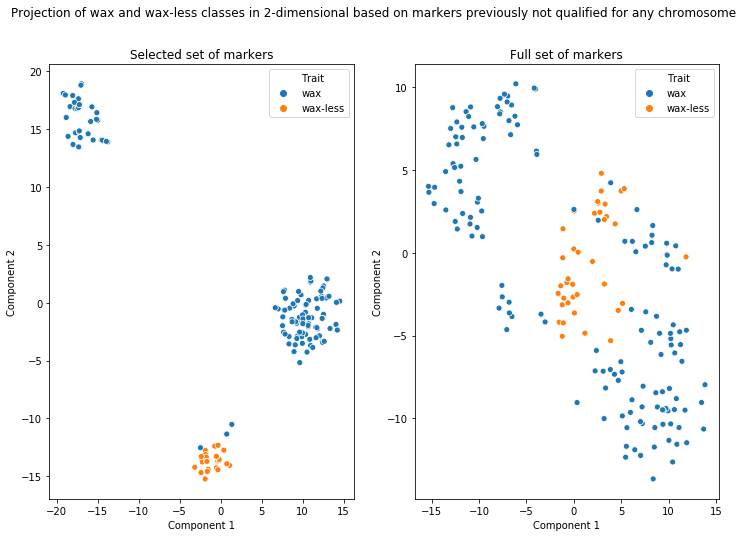

In [28]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle("Projection of wax and wax-less classes in 2-dimensional based on markers previously not qualified for any chromosome")
ax1.title.set_text('Selected set of markers')
ax2.title.set_text('Full set of markers')

# data after selection
sns.scatterplot(data=B_reduced, x="Component 1", y="Component 2", hue="Trait", ax=ax1)

# raw data
sns.scatterplot(data=B_reduced_raw, x="Component 1", y="Component 2", hue="Trait", ax=ax2)

In [29]:
fig.savefig("../data/processed/plots/set_B/tSNE_B.png")
del fig